<a href="https://colab.research.google.com/github/CRISTIANJULIOCESAR/2022-1-iimas-deep/blob/main/UMAPS_VITAL_AND_PANEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [4]:
meta= pd.read_pickle('/content/drive/MyDrive/pan_cancer_diner/Clinical data from  tcga.R/metadata.pkl')

In [7]:
coordenadas = pd.read_pickle('/content/umap_shaps_1.pkl')

In [8]:
coordenadas['panel'] = meta['panel']

In [11]:
coordenadas['vital'] = meta['vital']

In [25]:
len(coordenadas['panel'].unique())

34

In [26]:
34

8.5

In [13]:
coordenadas

UMAP1      UMAP2 panel  vital
Unnamed: 0                                                            
84fd87d4-9b47-4852-b45c-1f681a58832c  9.726170   4.759691   LGG  Alive
2da36252-af74-4e0c-ae38-5f5fc6bdad6e  9.764622   5.114046   LGG  Alive
83acd71c-c12a-4394-ba8d-05e9c5ad2cf1  2.612552  -2.908580  FPPP  Alive
04d7ee0b-95ce-4af2-8140-547e9c6bd187 -0.325983   2.257787  LUSC  Alive
171f45e7-83e7-4286-970a-0dafa6f46d8a  0.639962   1.815404  HNSC  Alive
...                                        ...        ...   ...    ...
21ea6561-2bd1-4a3d-ae70-3c504530bb26 -0.161015   2.737351  HNSC   Dead
5d98ad4a-483f-4032-ae9e-0ab6d398da98  2.778278  10.369256  LAML   Dead
3a74e5d3-48e7-4df9-85e1-dd02d1c804c1  2.731675  -2.887007  BRCA  Alive
86fd69ec-fbe4-4ca7-a1a5-a42367527929  0.264630   2.009077  HNSC   Dead
a811e4bd-d1d5-4a97-bc7f-899906c7f145  7.095324   1.108962  LUAD  Alive

[10339 rows x 4 columns]

In [10]:
coordenadas['panel'].unique()

array(['LGG', 'FPPP', 'LUSC', 'HNSC', 'GBM', 'UVM', 'UCEC', 'SKCM',
       'TGCT', 'LIHC', 'STAD', 'BRCA', 'THCA', 'BLCA', 'SARC', 'KIRC',
       'PRAD', 'ACC', 'COAD', 'LUAD', 'ESCA', 'OV', 'PAAD', 'READ',
       'KICH', 'UCS', 'PCPG', 'LAML', 'CESC', 'KIRP', 'DLBC', 'MESO',
       'THYM', 'CHOL'], dtype=object)

In [14]:
coordenadas['vital'].unique()

array(['Alive', 'Dead'], dtype=object)

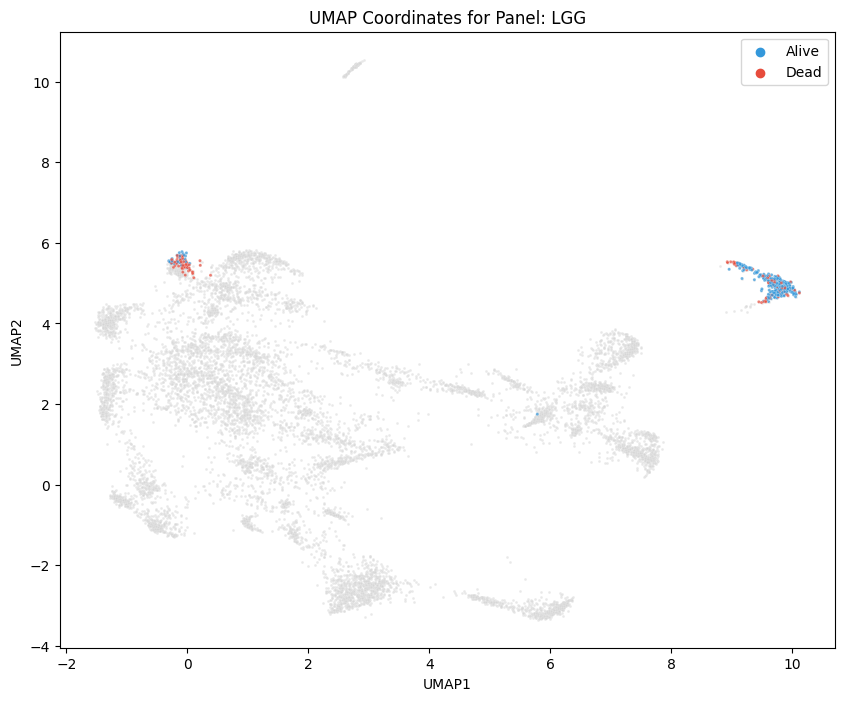

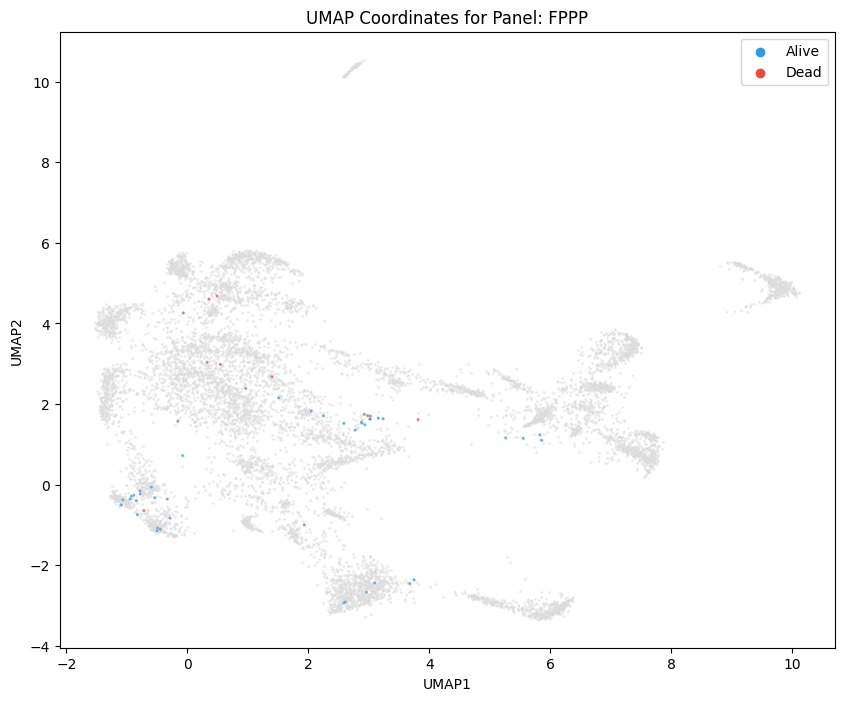

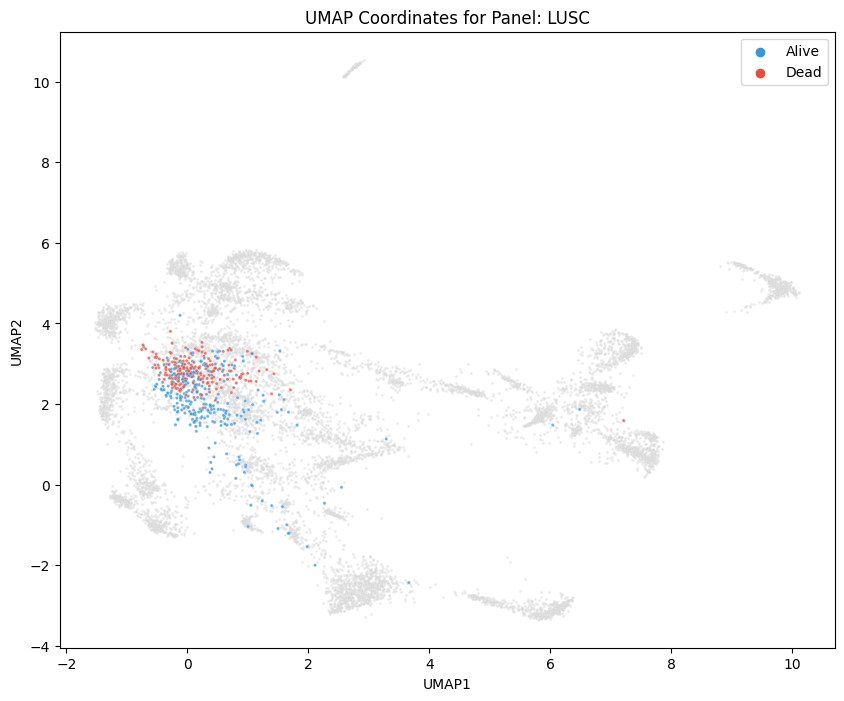

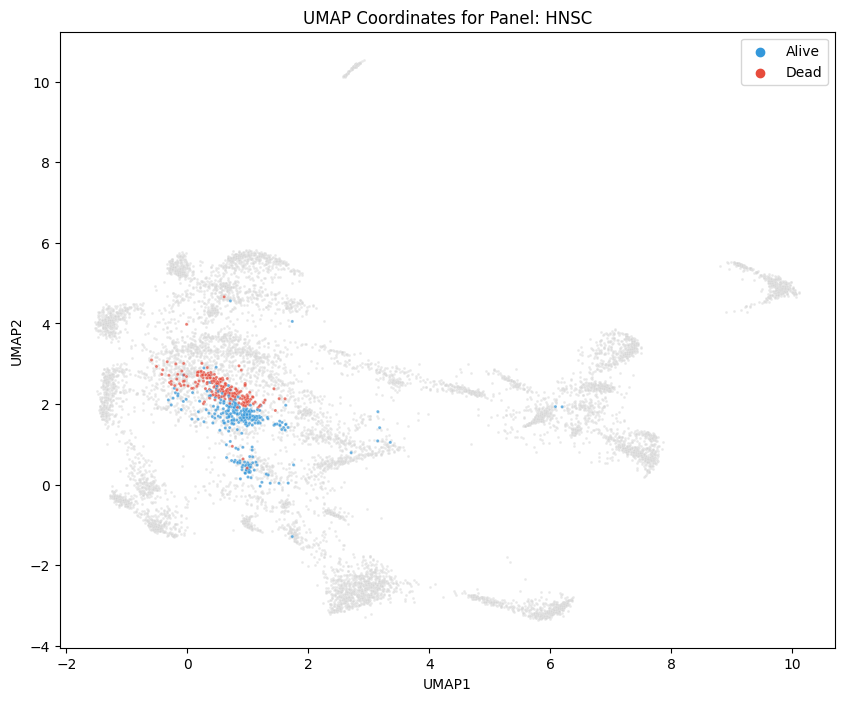

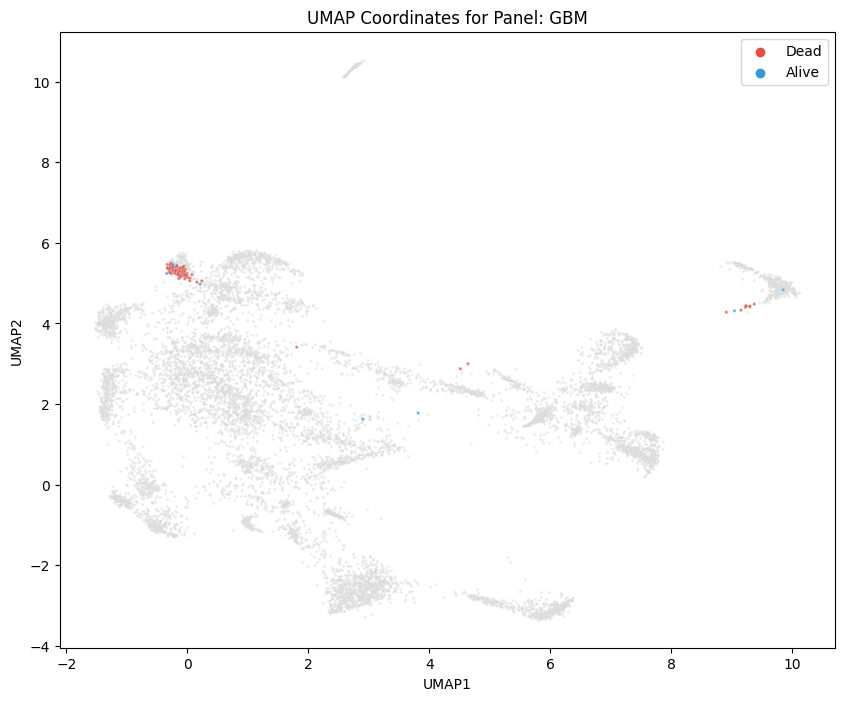

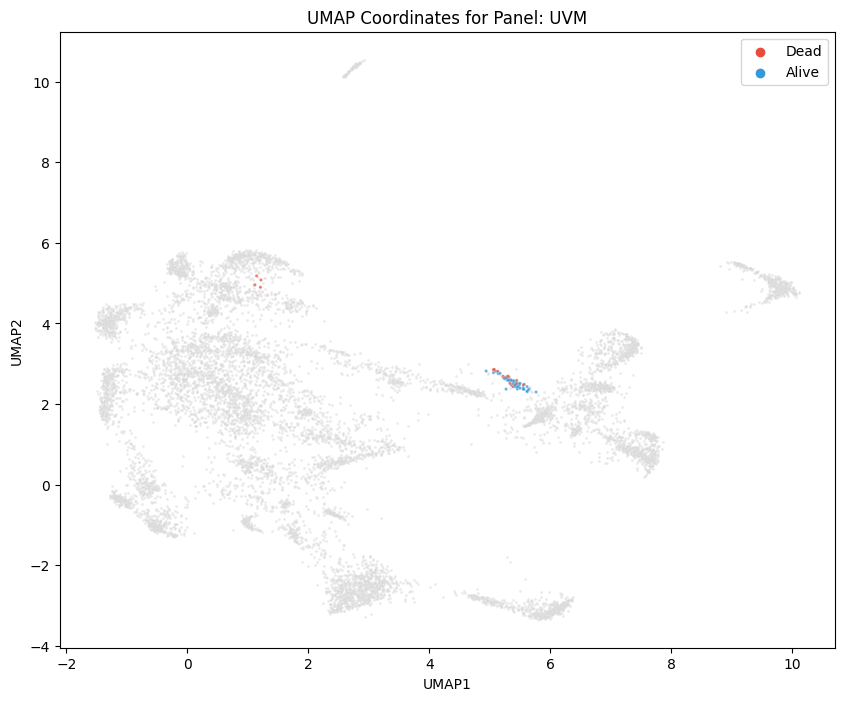

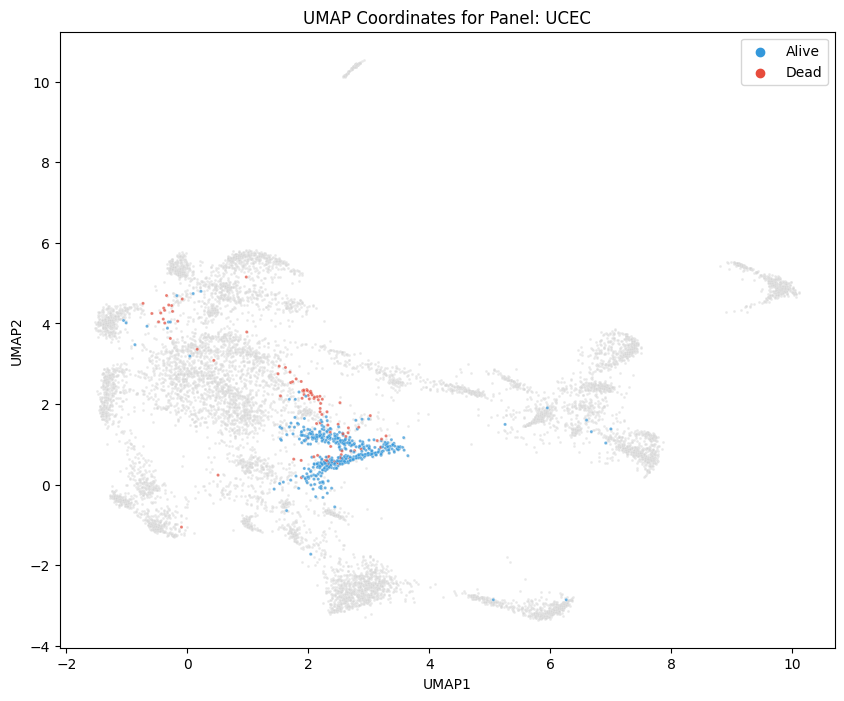

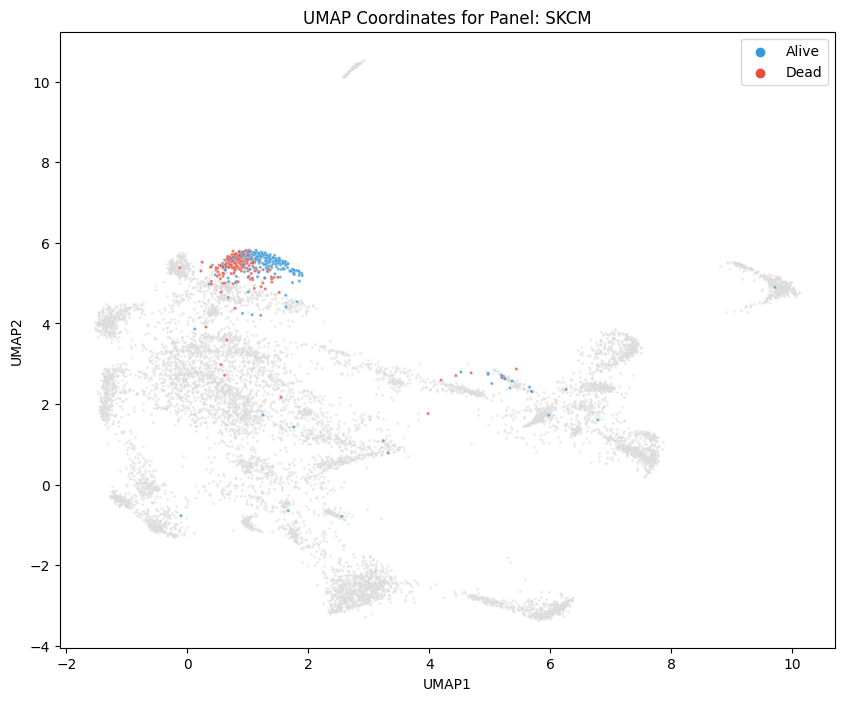

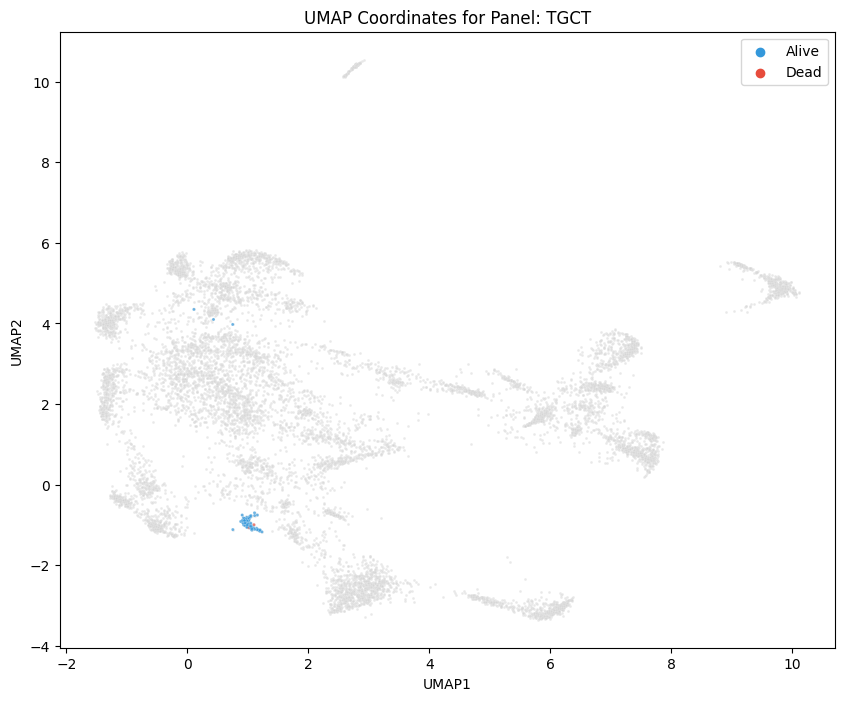

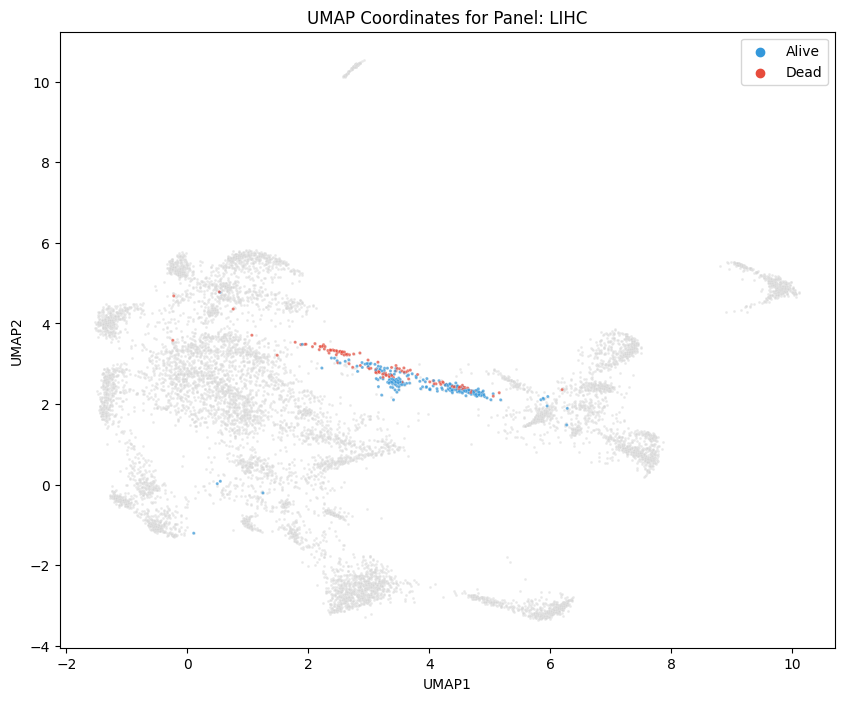

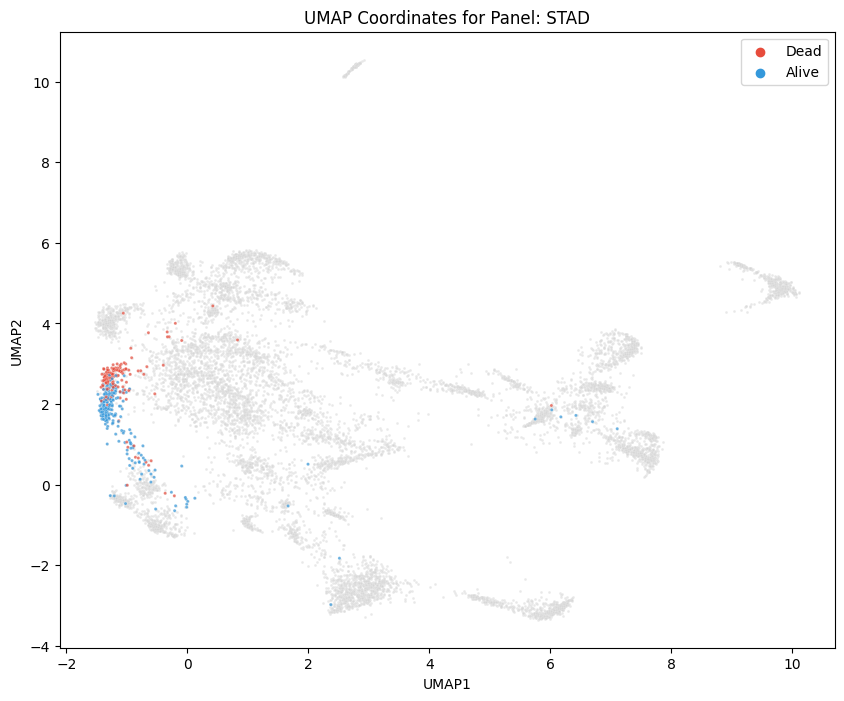

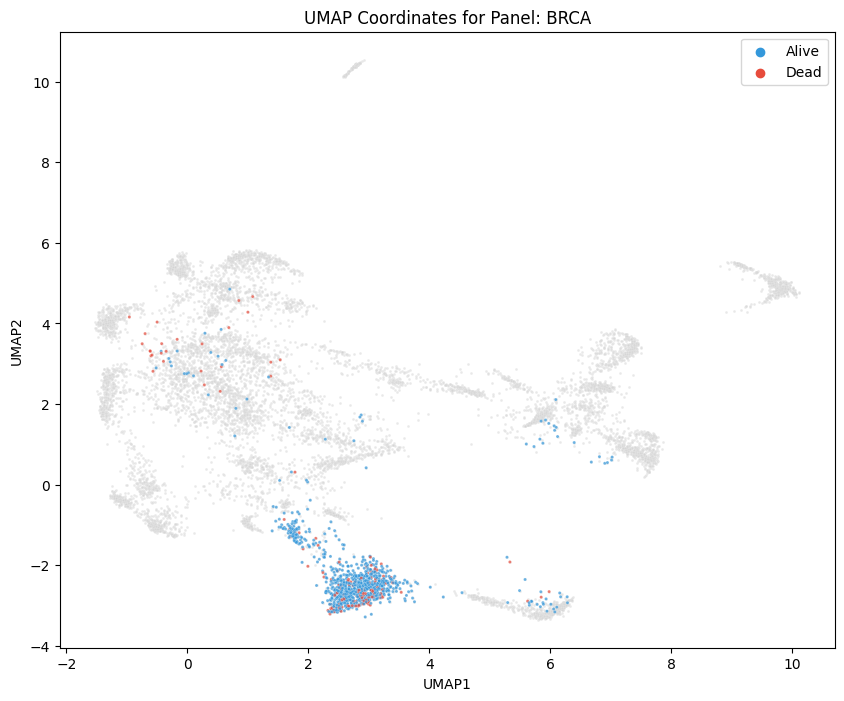

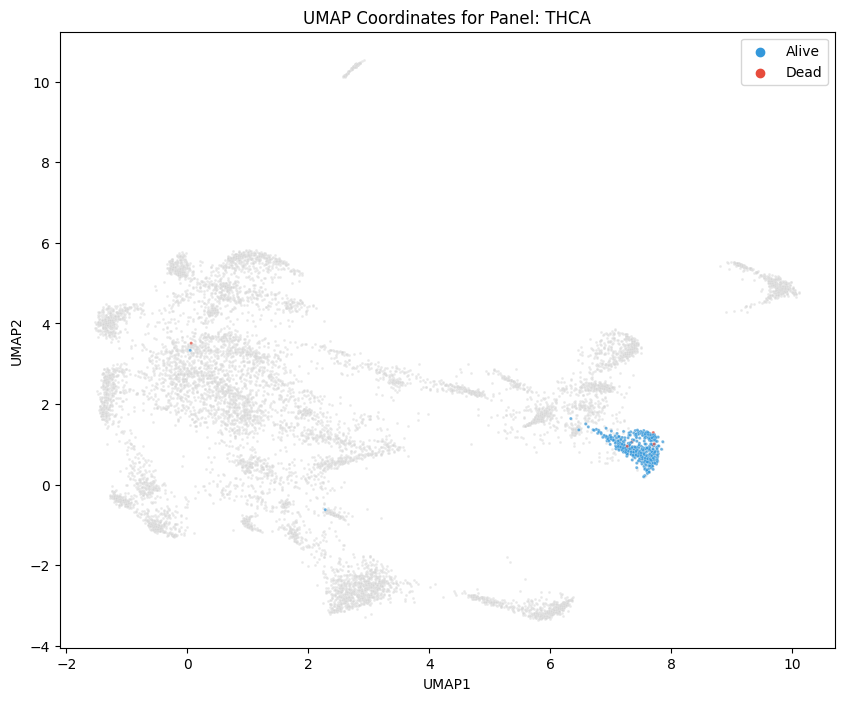

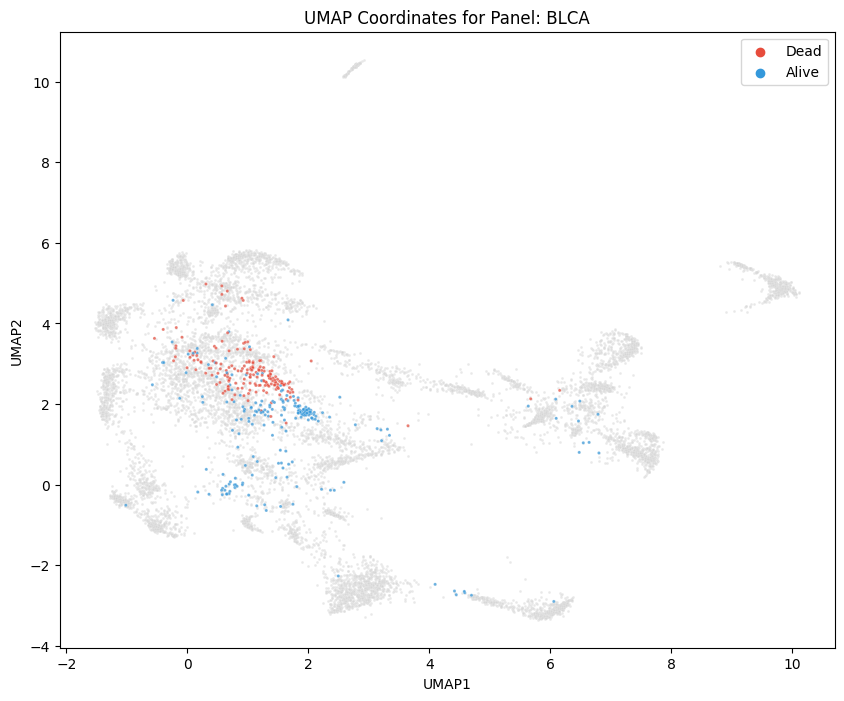

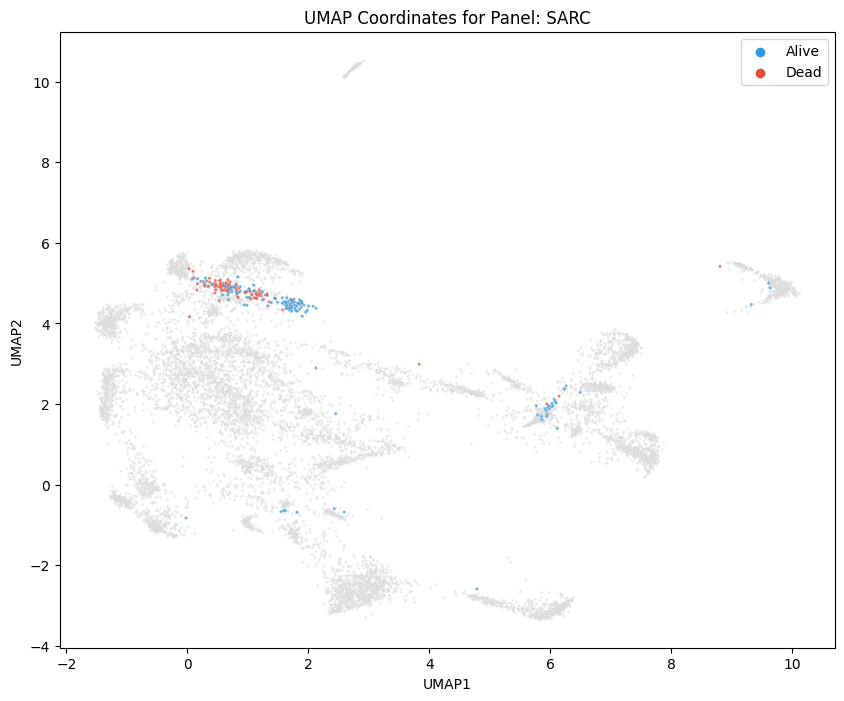

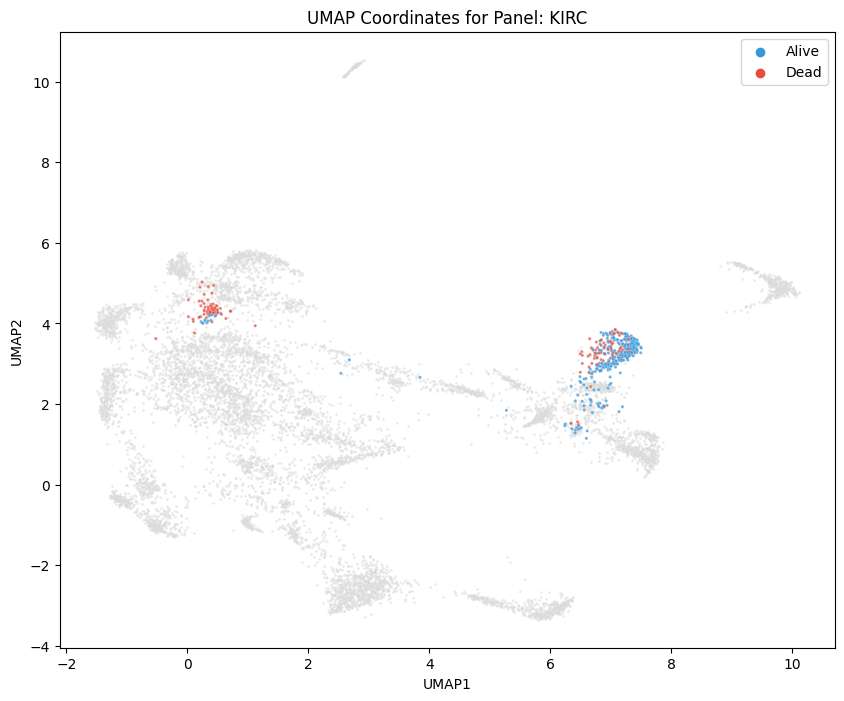

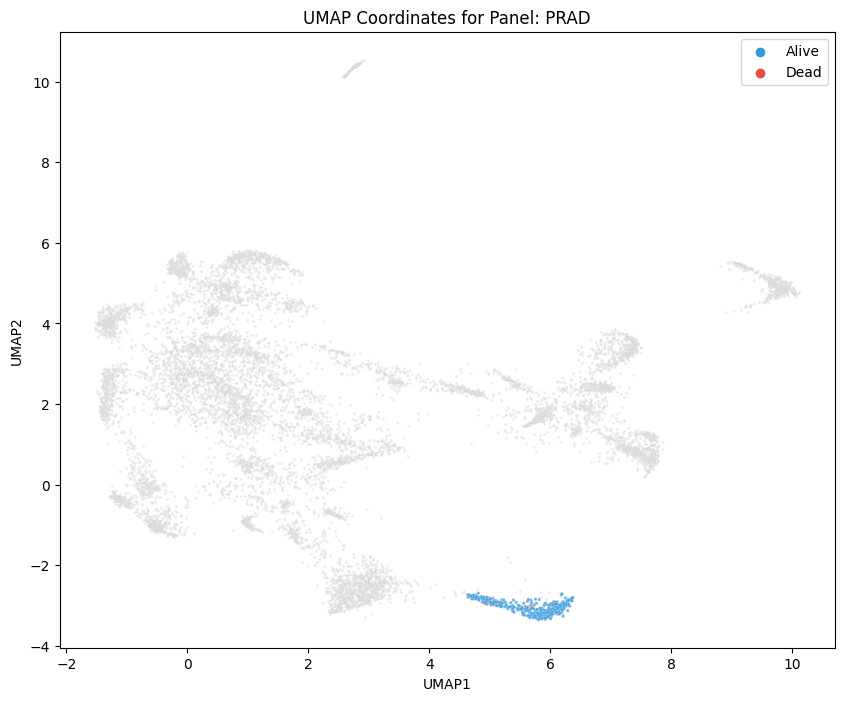

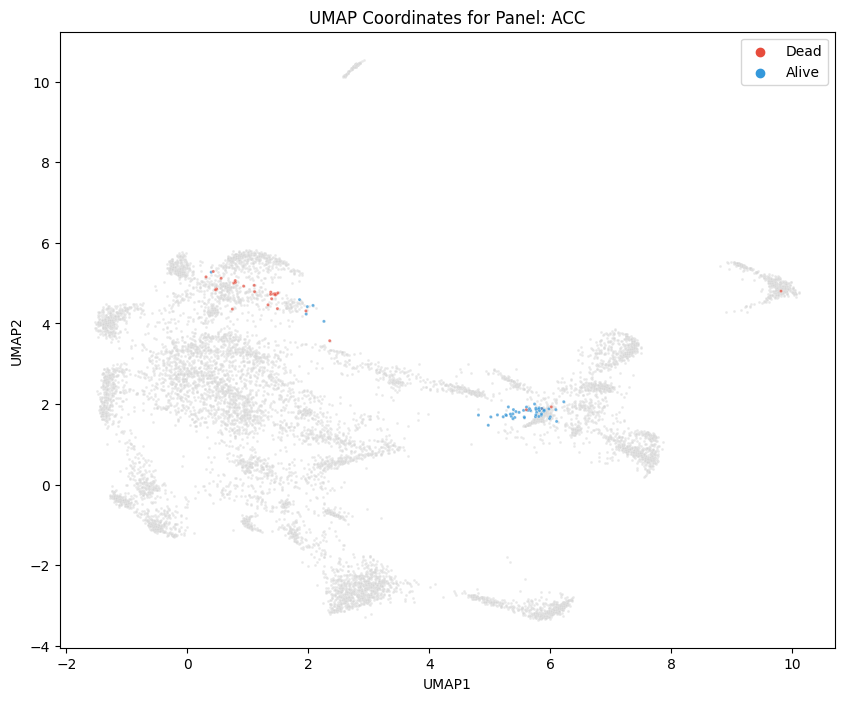

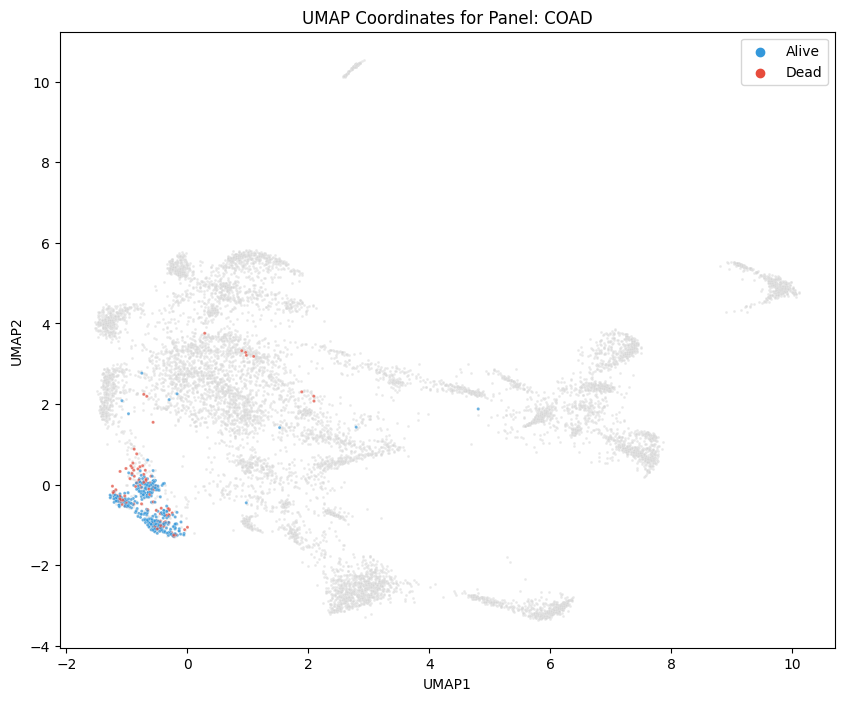

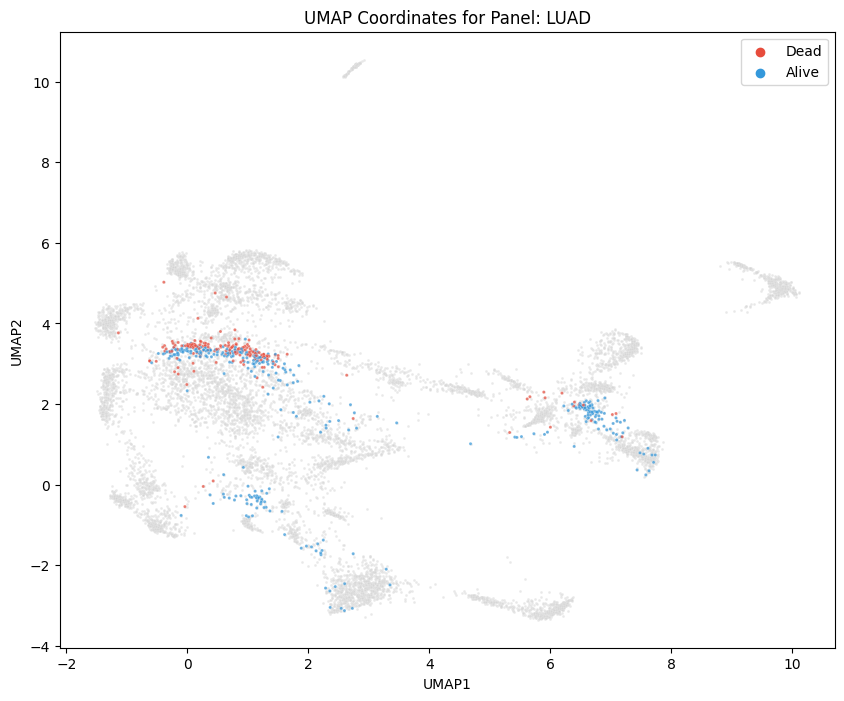

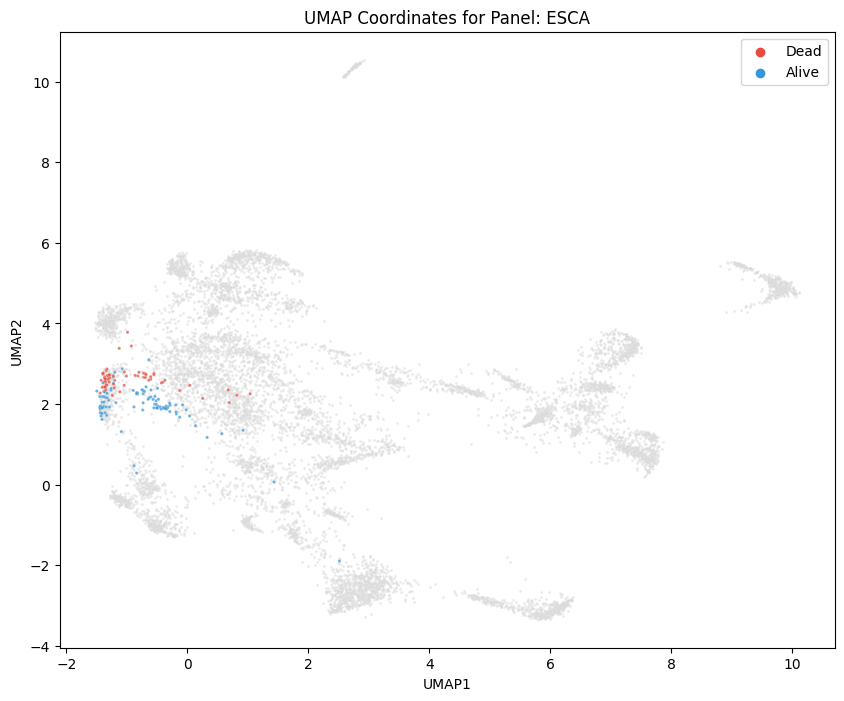

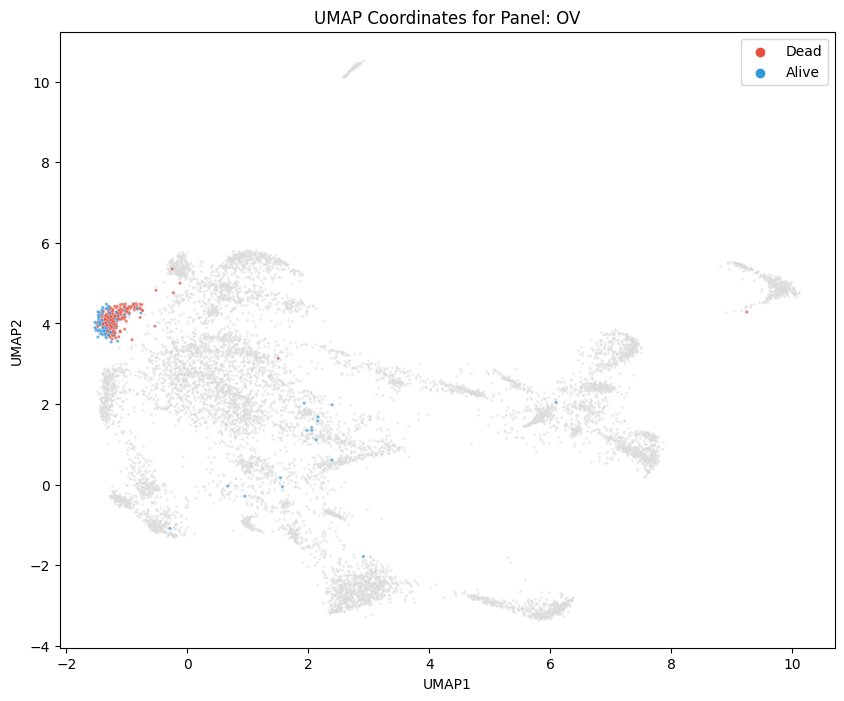

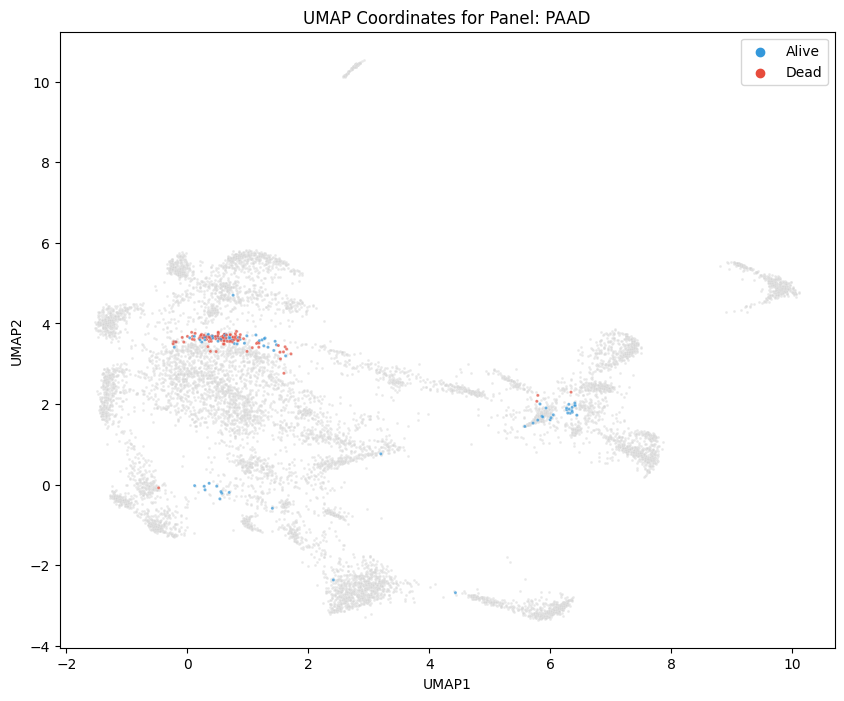

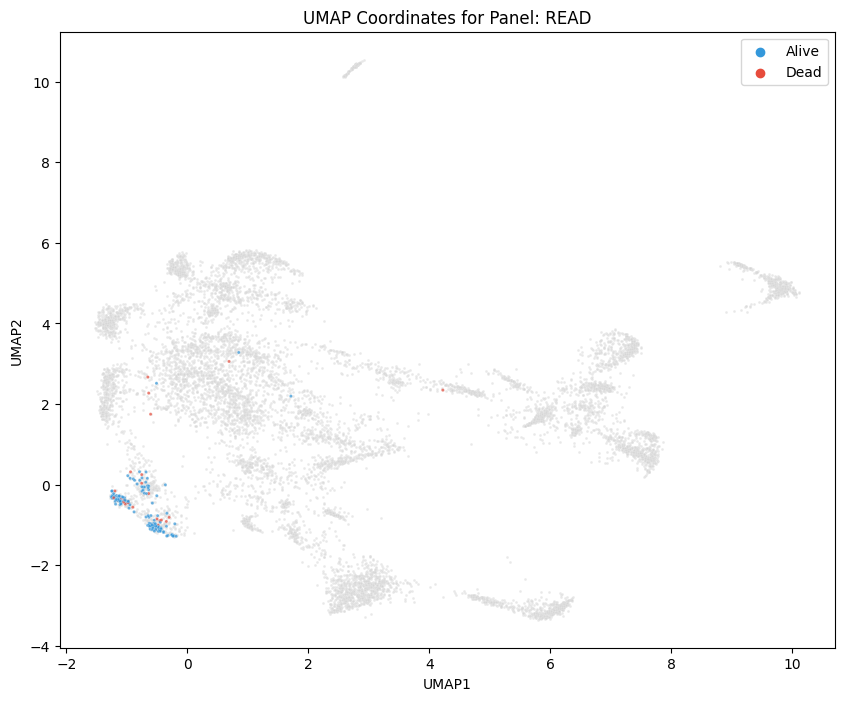

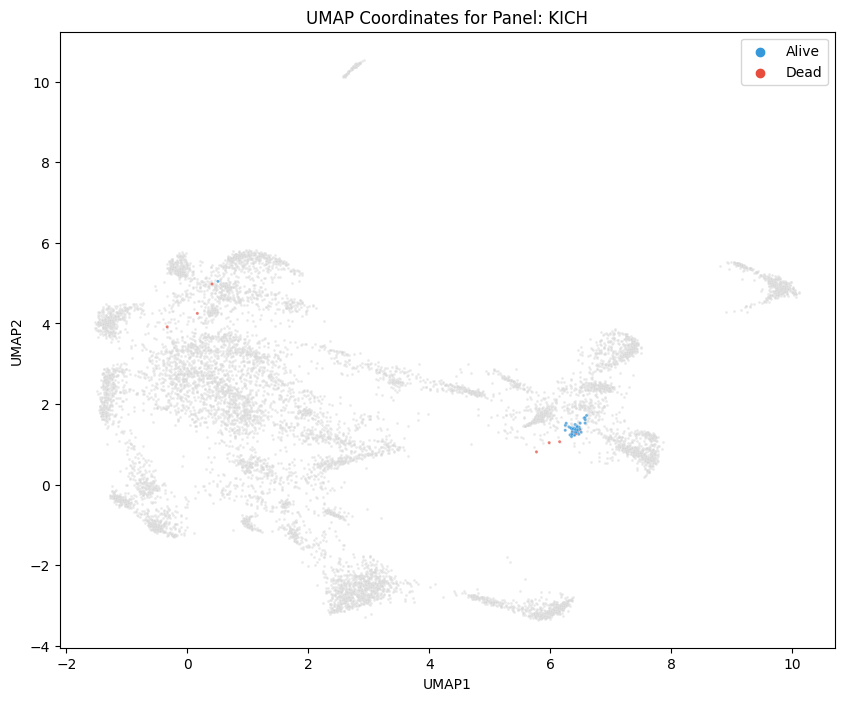

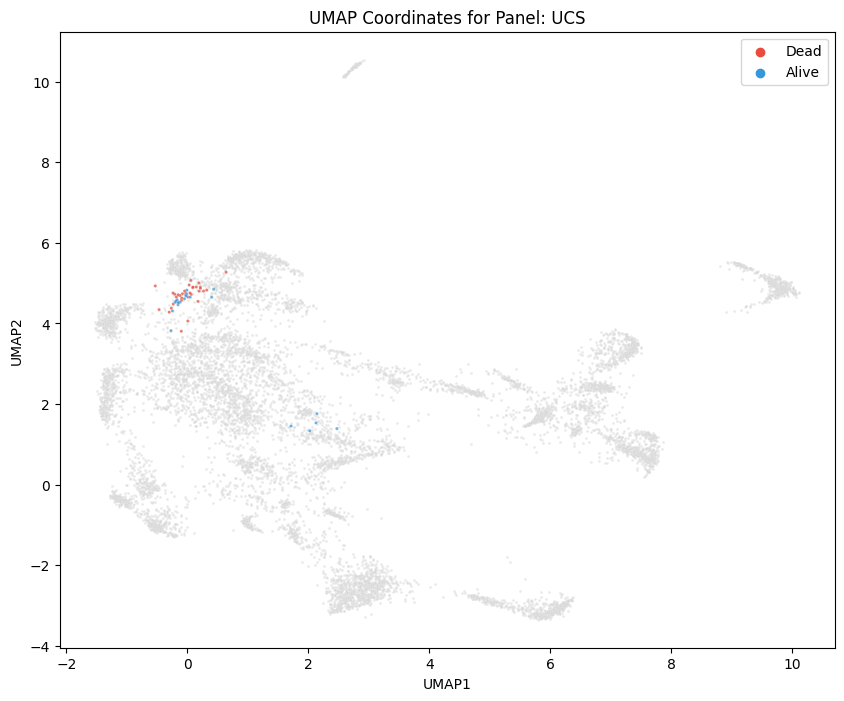

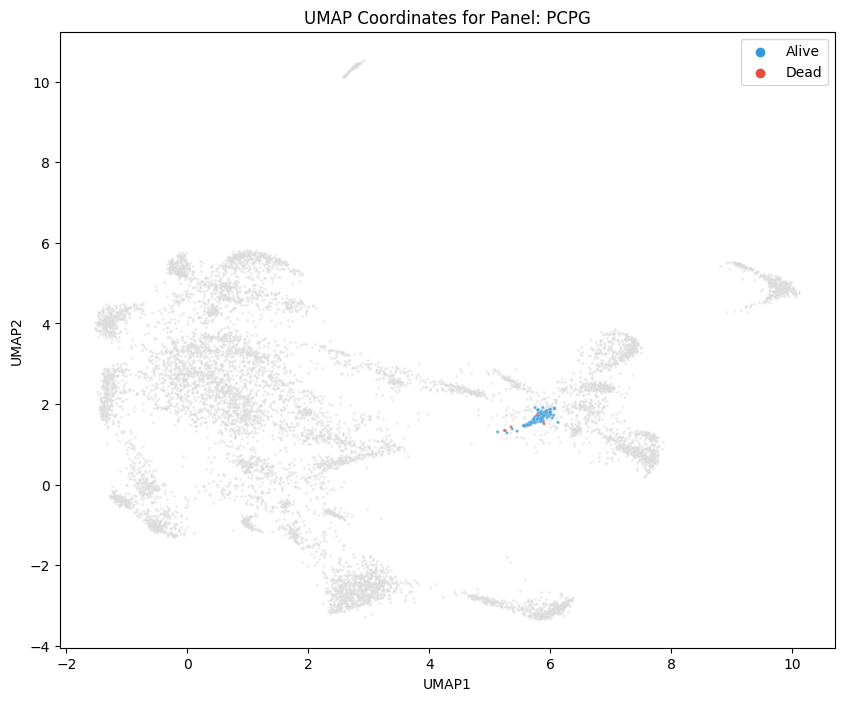

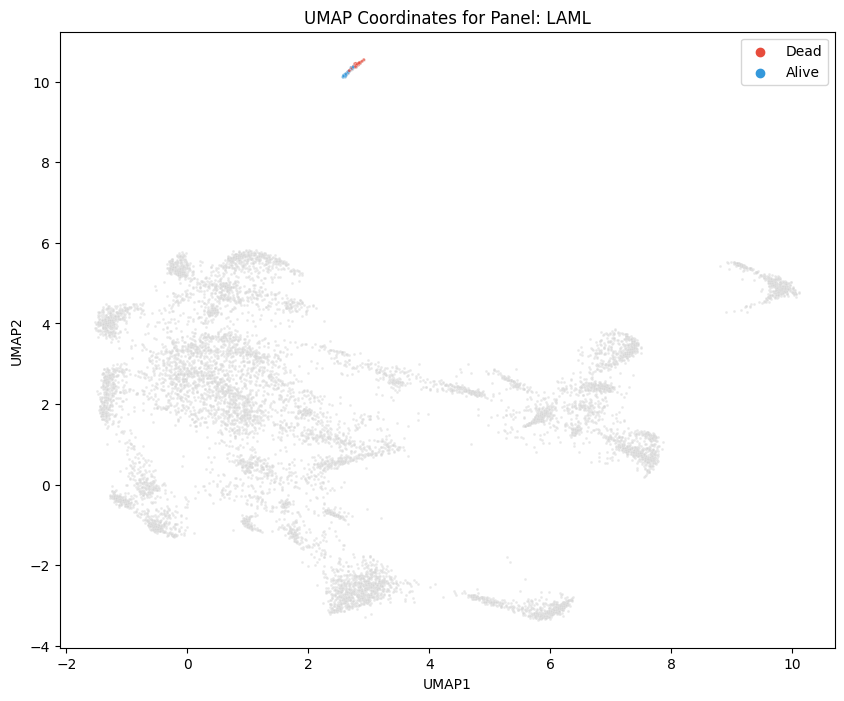

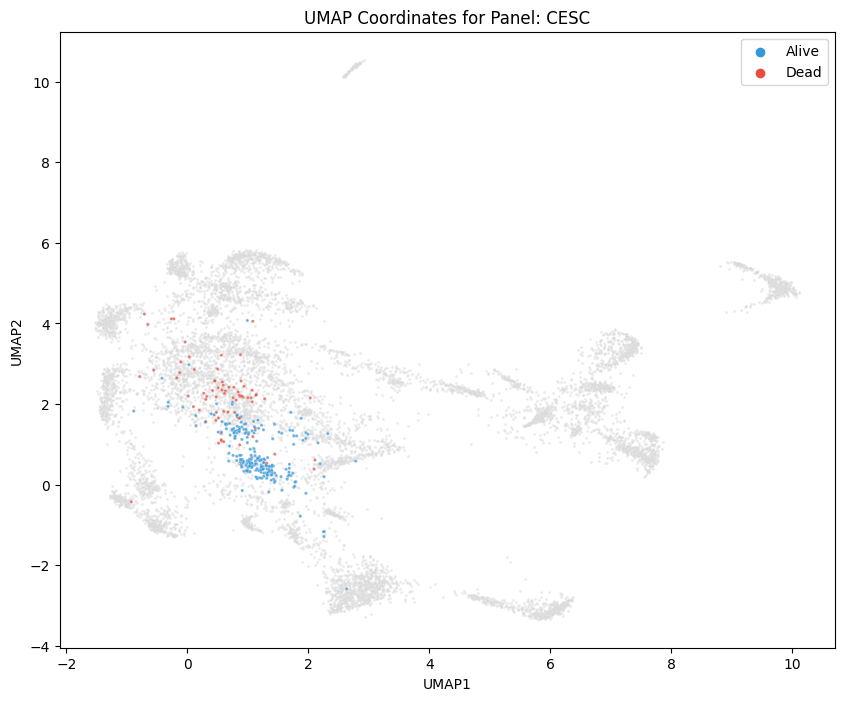

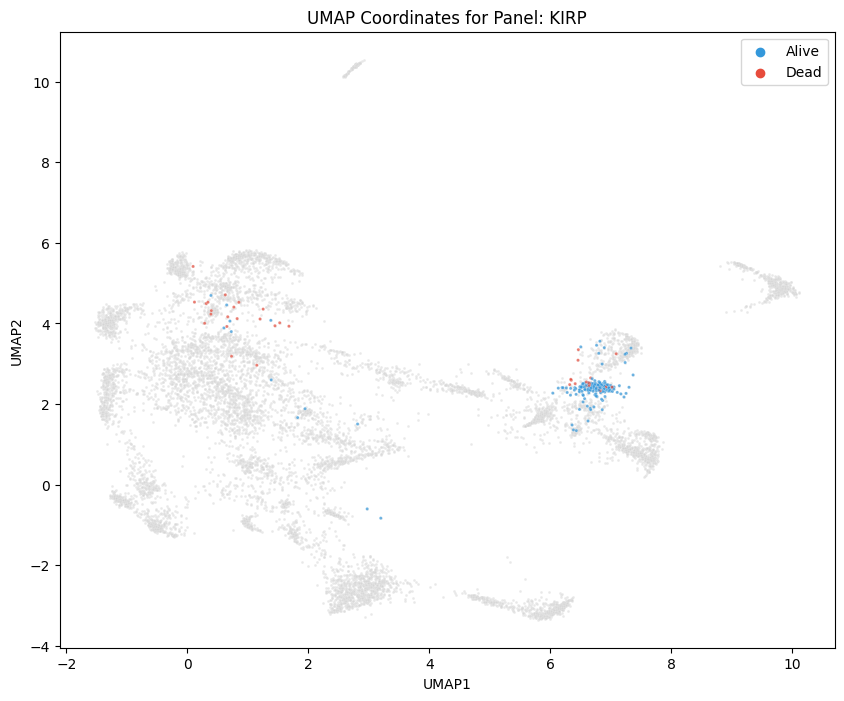

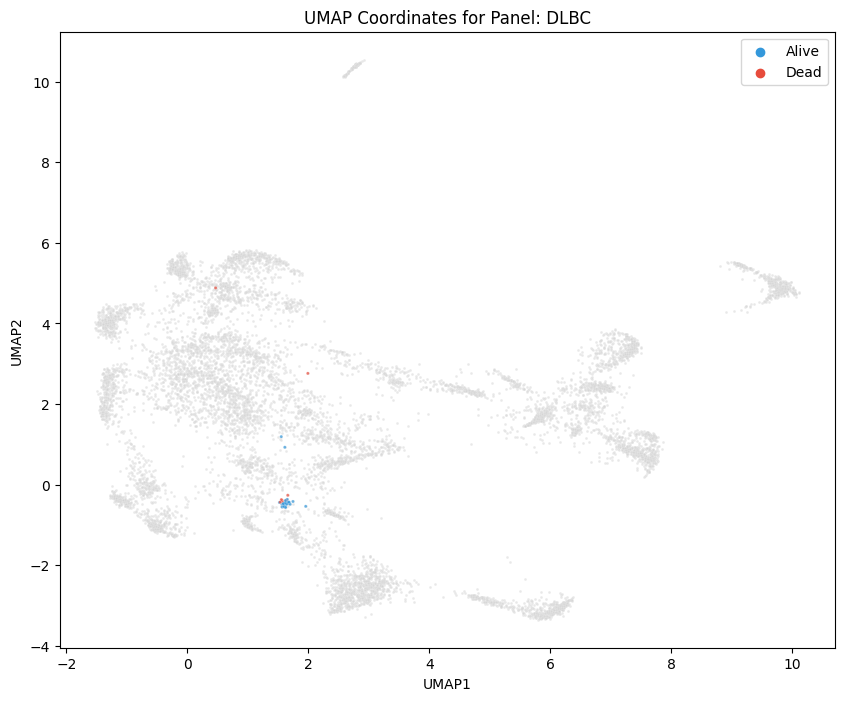

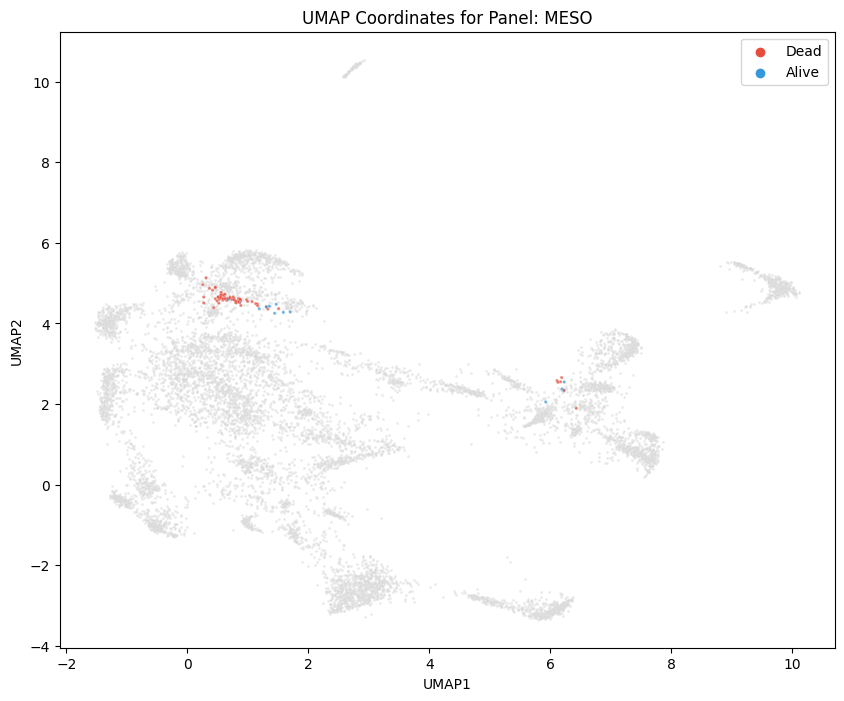

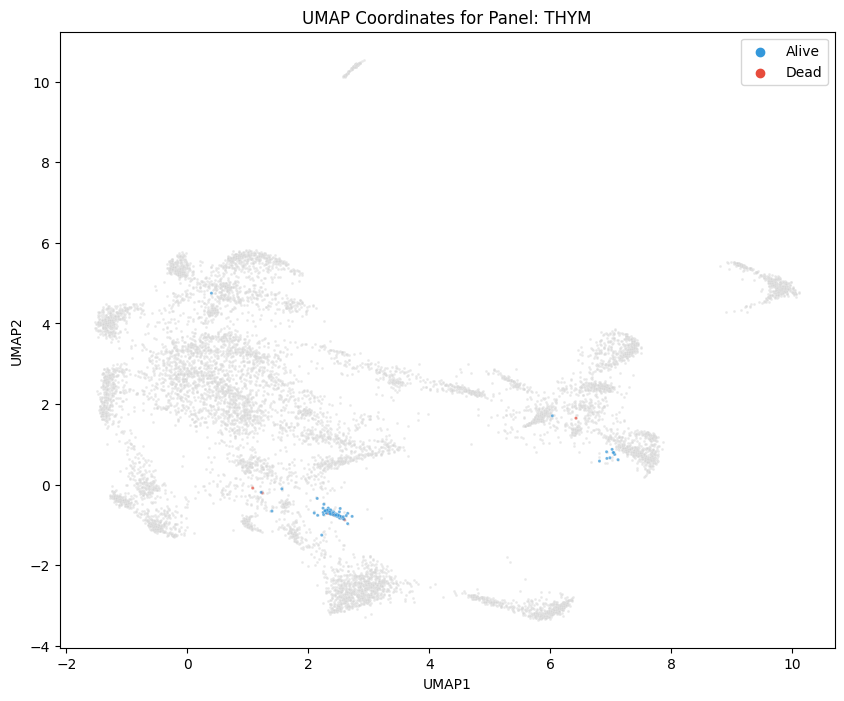

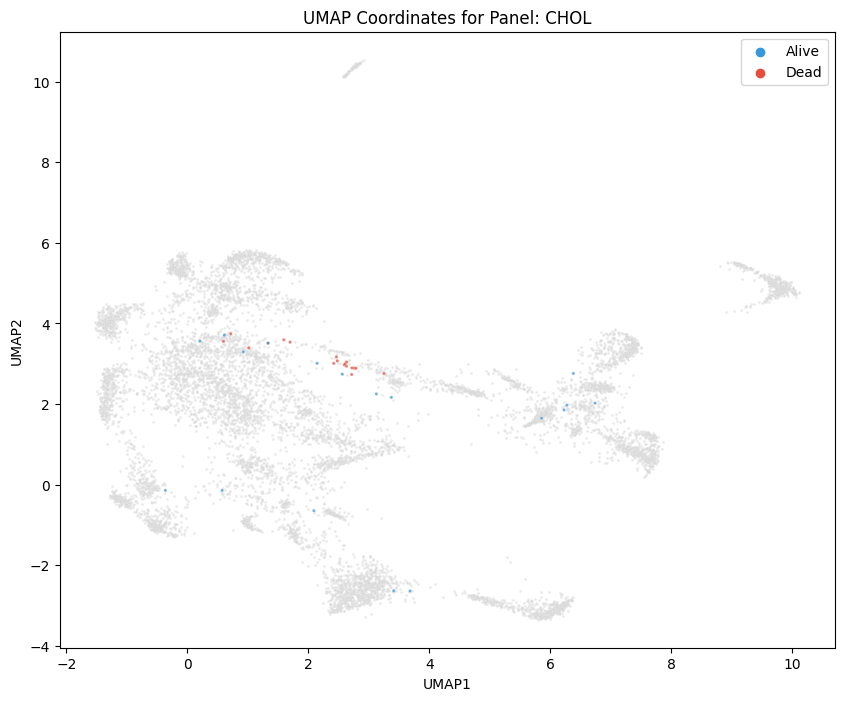

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Definiendo una paleta de colores personalizada
palette = {
    'Alive': '#3498db',  # Azul
    'Dead': '#e74c3c',   # Rojo
}

# Para cada panel único, crea un gráfico
for panel in coordenadas['panel'].unique():

    # Dibuja todos los puntos en gris tenue primero
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='UMAP1', y='UMAP2', data=coordenadas, color='lightgray', s=4, alpha=0.5)

    subset = coordenadas[coordenadas['panel'] == panel]

    sns.scatterplot(x='UMAP1', y='UMAP2', hue='vital', data=subset, palette=palette, s=5, alpha=0.7)
    plt.title(f'UMAP Coordinates for Panel: {panel}')
    plt.legend(loc='upper right')
    plt.show()


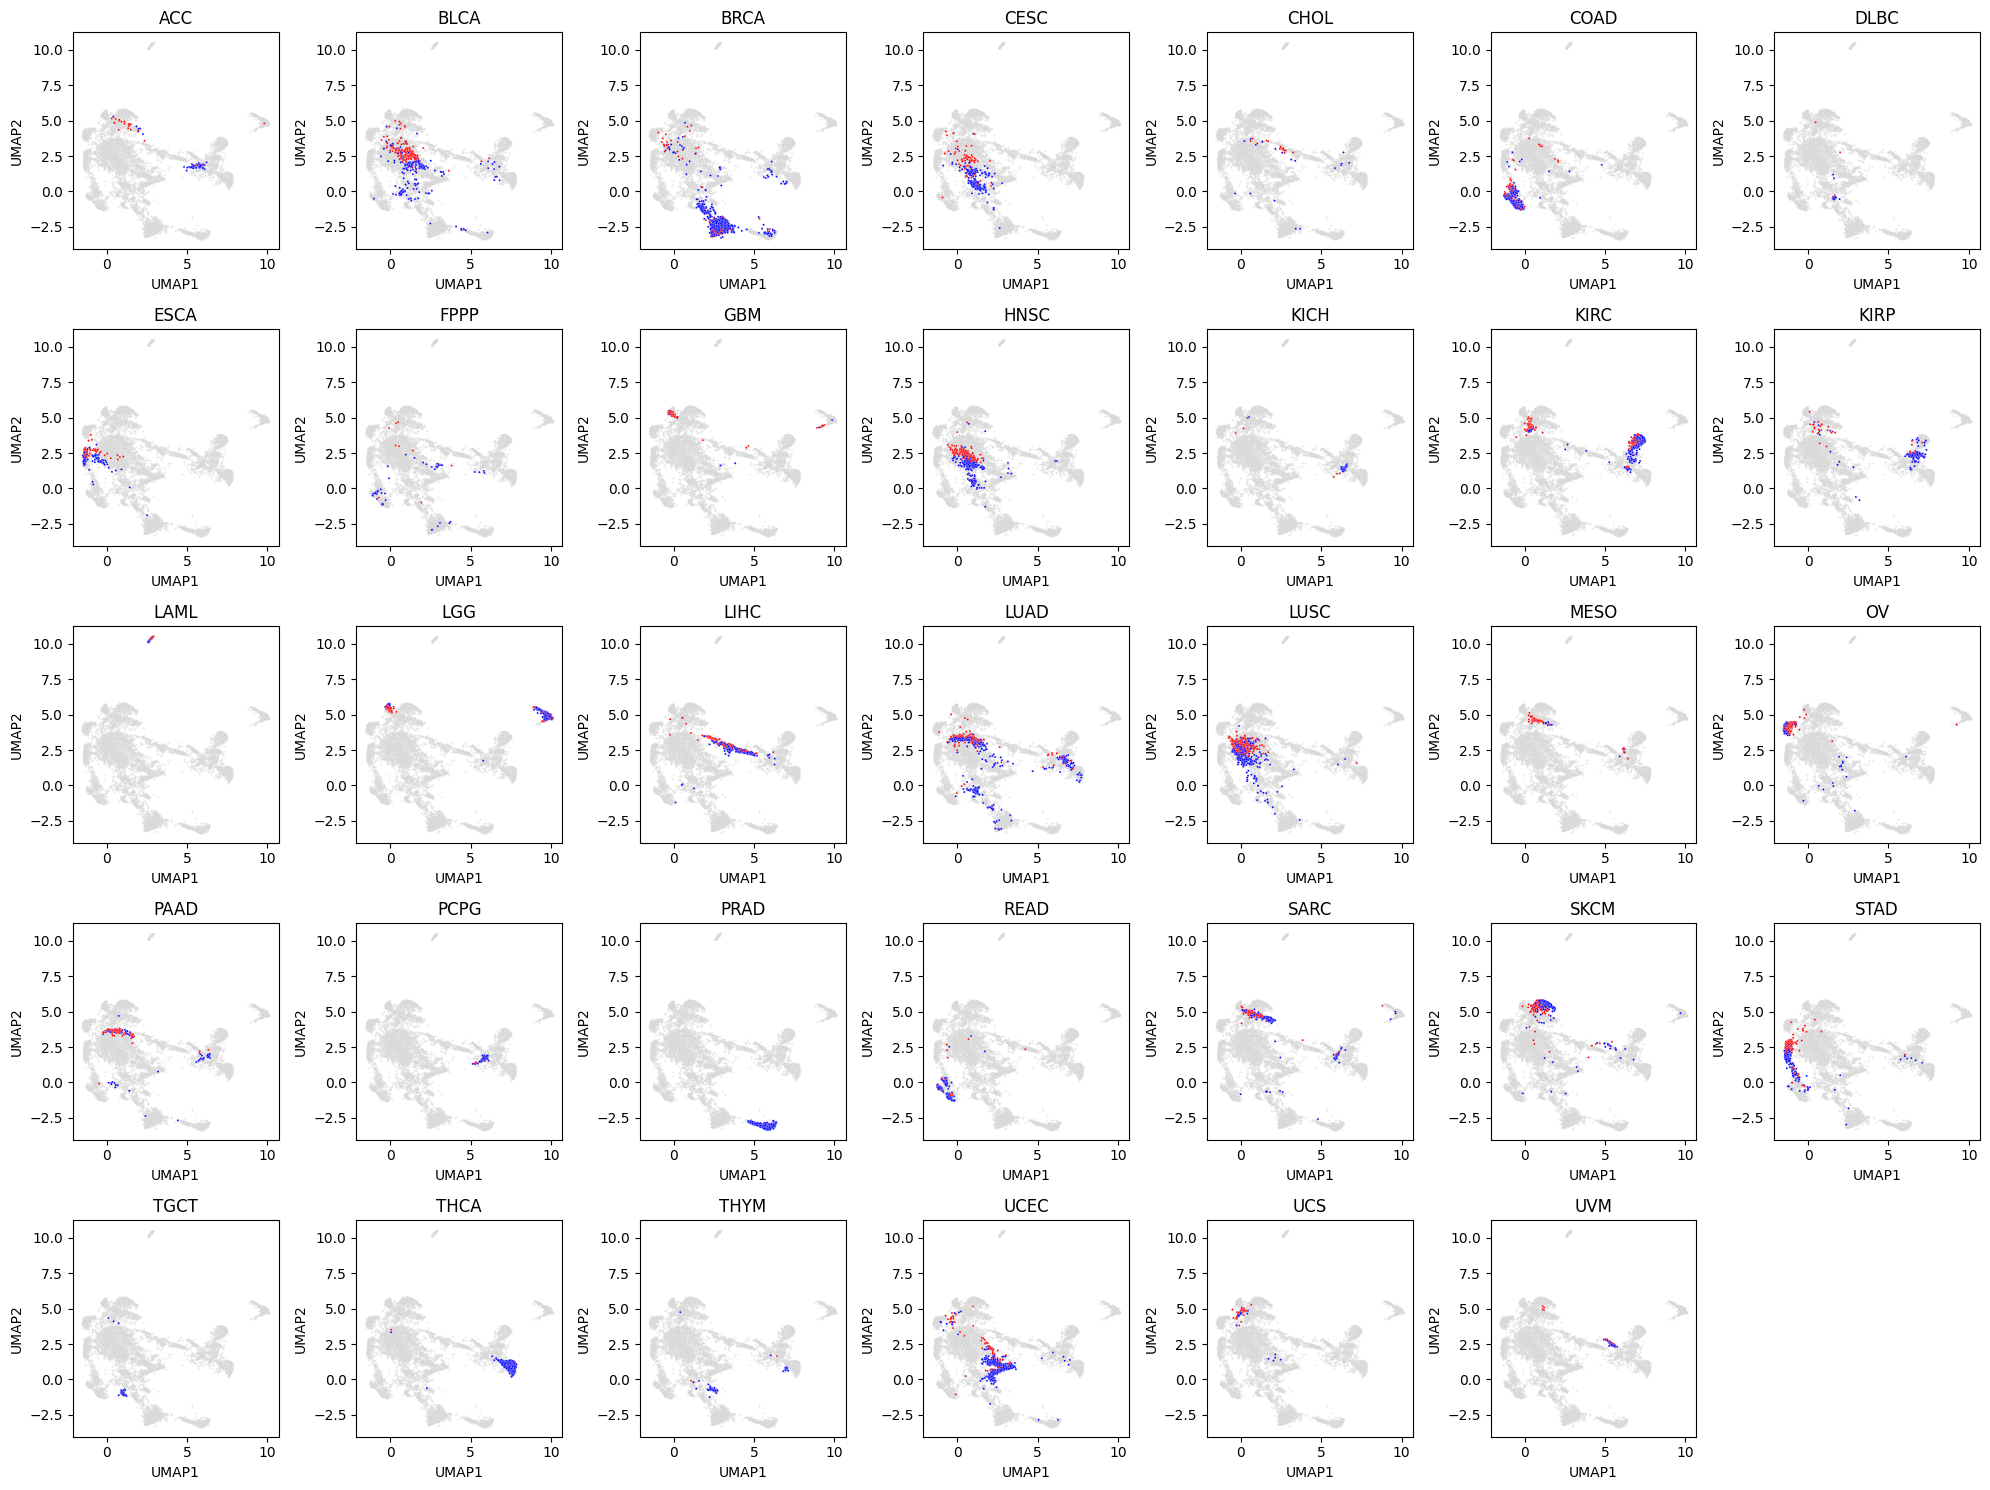

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tu DataFrame se llama 'coordenadas'
panels = sorted(coordenadas['panel'].unique())  # Ordenar los paneles alfabéticamente
palette = {"Alive": "blue", "Dead": "red"}

# Crear una figura con subgráficos de tamaño 5x7
fig, axes = plt.subplots(5, 7, figsize=(20, 15))

for i, panel in enumerate(panels):
    row = i // 7
    col = i % 7

    subset = coordenadas[coordenadas['panel'] == panel]

    # Pintar todos los puntos con un gris tenue en el fondo
    sns.scatterplot(x='UMAP1', y='UMAP2', data=coordenadas, ax=axes[row, col], color="lightgray", alpha=0.5, legend=False, s=2)

    # Pintar encima los puntos de interés
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='vital', data=subset, ax=axes[row, col], palette=palette, legend=False, s=2)

    # Título para cada subgráfico
    axes[row, col].set_title(panel)

# Eliminar ejes de las subfiguras que no se utilizan (si los hay)
if len(panels) < 35:
    for i in range(len(panels), 35):
        row = i // 7
        col = i % 7
        axes[row, col].axis("off")

plt.tight_layout()
fig.savefig("all umaps by panel and vital status of manifold of shaps.png", dpi=1000)

plt.show()


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil

# Definiendo una paleta de colores personalizada
palette = {
    'Alive': '#3498db',  # Azul
    'Dead': '#e74c3c',   # Rojo
}

output_folder = 'output_figures'  # Nombre del directorio de salida

# Asegúrate de que el directorio de salida exista o créalo
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Para cada panel único, crea un gráfico
for panel in coordenadas['panel'].unique():

    # Dibuja todos los puntos en gris tenue primero
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='UMAP1', y='UMAP2', data=coordenadas, color='lightgray', s=4, alpha=0.5)

    subset = coordenadas[coordenadas['panel'] == panel]

    sns.scatterplot(x='UMAP1', y='UMAP2', hue='vital', data=subset, palette=palette, s=5, alpha=0.7)
    plt.title(f'UMAP Coordinates for Panel: {panel}')
    plt.legend(loc='upper right')

    # Guardar la figura en el directorio de salida con alta calidad (300 DPI)
    file_name = os.path.join(output_folder, f'panel_{panel}.png')
    plt.savefig(file_name, dpi=600)
    plt.close()

# Comprimir el directorio de salida
shutil.make_archive(output_folder, 'zip', output_folder)

# Eliminar el directorio de salida no comprimido si lo deseas
shutil.rmtree(output_folder)

print('Todas las figuras han sido guardadas y comprimidas en un archivo ZIP.')


Todas las figuras han sido guardadas y comprimidas en un archivo ZIP.
